In [2]:
# https://www.kaggle.com/c/plant-seedlings-classification/data
from fastai import *
from fastai.vision import *
%matplotlib inline

In [3]:
path = Path('data')

In [3]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=64, size=128, ds_tfms=get_transforms(flip_vert=True))

In [4]:
learn = create_cnn(data, models.resnet50, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/nbuser/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 28246654.42it/s]


In [5]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


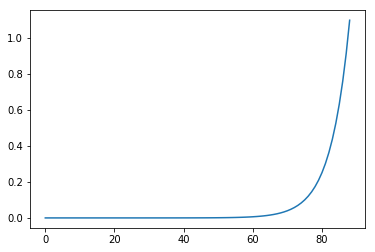

In [6]:
learn.recorder.plot_lr()

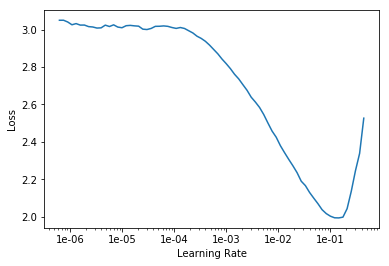

In [7]:
learn.recorder.plot()

In [8]:
learn.fit(4, lr=1e-2)

Total time: 02:00
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.893517    0.541640    0.200850    0.799150  (00:33)
2      0.579262    0.502388    0.165781    0.834219  (00:28)
3      0.448738    0.658118    0.201913    0.798087  (00:29)
4      0.406146    0.386795    0.140276    0.859724  (00:28)



In [9]:
learn.save('4epochs-resnet50')

In [10]:
learn.fit(4, lr=1e-2)

Total time: 01:55
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.465736    0.455916    0.174283    0.825717  (00:28)
2      0.384070    0.463407    0.161530    0.838470  (00:28)
3      0.367151    0.362773    0.126461    0.873539  (00:28)
4      0.351193    0.318083    0.103082    0.896918  (00:28)



In [11]:
learn.save('8epochs-resnet50')

In [12]:
learn.fit(4, lr=1e-2)

Total time: 01:56
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.322103    0.628448    0.155154    0.844846  (00:29)
2      0.313958    0.420197    0.151966    0.848034  (00:28)
3      0.299521    0.306235    0.115834    0.884166  (00:28)
4      0.285943    0.272779    0.106270    0.893730  (00:29)



In [13]:
learn.load('8epochs-resnet50')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f76ad2a6780>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        

In [14]:
learn.fit_one_cycle(4, max_lr=1e-2/5)

Total time: 01:56
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.226194    0.183899    0.075452    0.924548  (00:29)
2      0.201844    0.162280    0.065887    0.934113  (00:29)
3      0.173021    0.146050    0.060574    0.939426  (00:29)
4      0.155697    0.146376    0.063762    0.936238  (00:28)



In [15]:
learn.save('12epochs-resnet50')

In [16]:
learn.fit_one_cycle(4, max_lr=1e-2/10)

Total time: 01:56
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.153634    0.138603    0.060574    0.939426  (00:28)
2      0.147869    0.136443    0.057386    0.942614  (00:28)
3      0.147307    0.138648    0.057386    0.942614  (00:28)
4      0.125274    0.135635    0.057386    0.942614  (00:30)



In [17]:
learn.save('16epochs-resnet50')

In [18]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


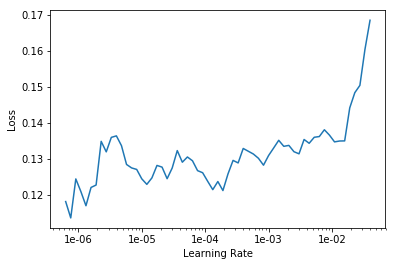

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(4, max_lr=1e-4)

Total time: 01:55
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.137021    0.132741    0.054198    0.945802  (00:28)
2      0.128383    0.133113    0.055260    0.944740  (00:28)
3      0.126445    0.134316    0.055260    0.944740  (00:29)
4      0.124796    0.133110    0.058448    0.941552  (00:28)



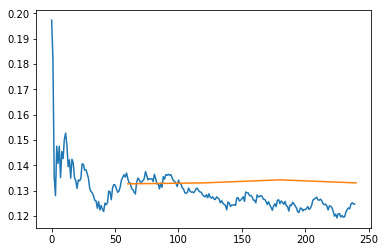

In [21]:
learn.recorder.plot_losses()

In [22]:
learn.fit_one_cycle(6, max_lr=1e-4/5)

Total time: 02:52
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.130644    0.133908    0.056323    0.943677  (00:28)
2      0.118924    0.133715    0.052072    0.947928  (00:29)
3      0.125009    0.132580    0.052072    0.947928  (00:28)
4      0.127303    0.135108    0.053135    0.946865  (00:28)
5      0.133399    0.132763    0.055260    0.944740  (00:28)
6      0.119800    0.136243    0.054198    0.945802  (00:28)



In [23]:
learn.save('stage-1-resnet50')

In [24]:
learn.unfreeze()
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


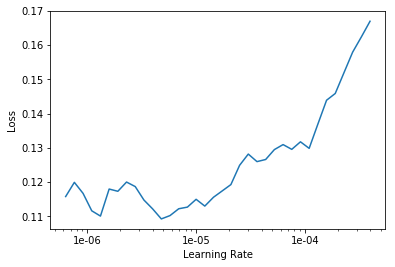

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(4, max_lr=slice(1e-7, 1e-6))

Total time: 02:22
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.120227    0.133550    0.054198    0.945802  (00:37)
2      0.127147    0.132179    0.052072    0.947928  (00:34)
3      0.127977    0.130718    0.055260    0.944740  (00:35)
4      0.127858    0.134938    0.049947    0.950053  (00:34)



In [27]:
learn.fit_one_cycle(4, max_lr=slice(1e-9, 1e-7))

Total time: 02:20
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.116539    0.135484    0.051010    0.948990  (00:35)
2      0.124354    0.132999    0.051010    0.948990  (00:34)
3      0.128758    0.132106    0.053135    0.946865  (00:34)
4      0.123438    0.132683    0.054198    0.945802  (00:35)



In [28]:
learn.save('stage-2-resnet50')

In [29]:
data2 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=48, size=224, ds_tfms=get_transforms(flip_vert=True))

In [30]:
learn.data = data2

In [31]:
learn.freeze()

In [32]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


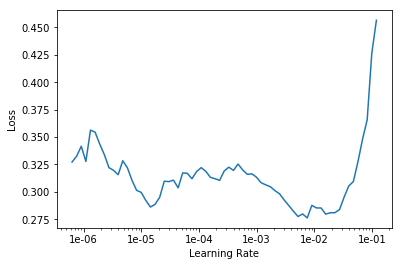

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(10, max_lr=1e-2/5)

Total time: 11:18
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.237144    0.109712    0.033014    0.966986  (01:14)
2      0.190820    0.117899    0.042598    0.957402  (01:06)
3      0.159723    0.102355    0.028754    0.971246  (01:07)
4      0.149085    0.108359    0.036209    0.963791  (01:07)
5      0.148056    0.097356    0.031949    0.968051  (01:07)
6      0.131691    0.092643    0.028754    0.971246  (01:06)
7      0.108699    0.100132    0.031949    0.968051  (01:07)
8      0.088348    0.087886    0.026624    0.973376  (01:07)
9      0.086286    0.080257    0.026624    0.973376  (01:07)
10     0.091653    0.081371    0.025559    0.974441  (01:07)



In [35]:
learn.save('10_224-resnet50')

In [36]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


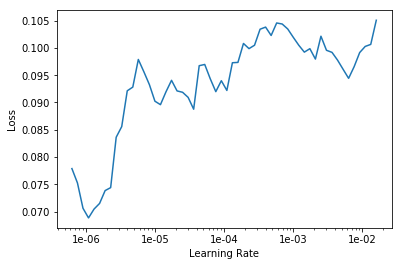

In [37]:
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

Total time: 05:35
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.083624    0.080822    0.025559    0.974441  (01:06)
2      0.088655    0.081957    0.025559    0.974441  (01:07)
3      0.081470    0.081122    0.028754    0.971246  (01:06)
4      0.087018    0.082922    0.027689    0.972311  (01:06)
5      0.080772    0.083504    0.028754    0.971246  (01:07)



In [39]:
learn.fit_one_cycle(5, max_lr=slice(1e-8, 1e-6))

Total time: 05:37
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.087650    0.081752    0.027689    0.972311  (01:07)
2      0.096201    0.080926    0.025559    0.974441  (01:07)
3      0.092436    0.083917    0.028754    0.971246  (01:07)
4      0.095888    0.080334    0.026624    0.973376  (01:07)
5      0.087287    0.086270    0.026624    0.973376  (01:07)



In [40]:
learn.fit_one_cycle(5, max_lr=slice(1e-10, 1e-8))

Total time: 05:37
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.082986    0.080664    0.024494    0.975506  (01:07)
2      0.085163    0.081085    0.025559    0.974441  (01:07)
3      0.086029    0.081423    0.026624    0.973376  (01:07)
4      0.083338    0.082550    0.027689    0.972311  (01:07)
5      0.090084    0.081177    0.024494    0.975506  (01:07)



In [41]:
learn.save('25_225-resnet50')

In [42]:
learn.unfreeze()

In [43]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


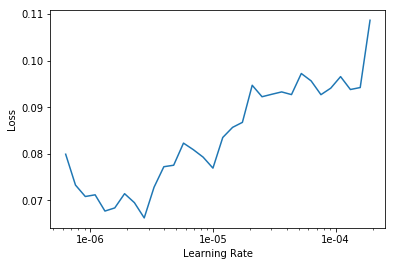

In [44]:
learn.recorder.plot()

In [45]:
learn.lr_find(1e-11, 1e-4)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


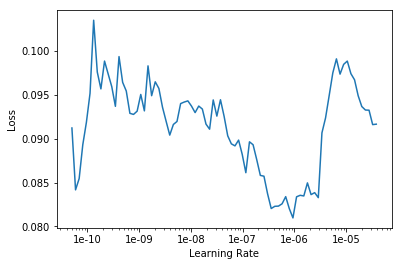

In [46]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-5))

Total time: 07:14
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.085629    0.081642    0.026624    0.973376  (01:26)
2      0.088194    0.089912    0.028754    0.971246  (01:27)
3      0.099251    0.083434    0.026624    0.973376  (01:26)
4      0.087817    0.082901    0.027689    0.972311  (01:26)
5      0.078211    0.083020    0.028754    0.971246  (01:27)



In [48]:
learn.fit_one_cycle(5, max_lr=slice(1e-8, 1e-6))

Total time: 07:13
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.091732    0.082536    0.028754    0.971246  (01:26)
2      0.077974    0.083246    0.027689    0.972311  (01:26)
3      0.081811    0.082352    0.029819    0.970181  (01:26)
4      0.079497    0.080693    0.026624    0.973376  (01:26)
5      0.084753    0.083197    0.029819    0.970181  (01:26)



In [49]:
learn.save('224_stage-2-resnet50')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


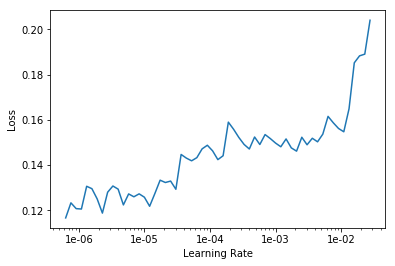

In [50]:
data3 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=32, size=299, ds_tfms=get_transforms(flip_vert=True))
learn.data = data3
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(5, max_lr=1e-3)

Total time: 10:27
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.132439    0.071789    0.019628    0.980372  (02:20)
2      0.153573    0.065440    0.022727    0.977273  (02:01)
3      0.143510    0.065868    0.021694    0.978306  (02:02)
4      0.113020    0.065737    0.023760    0.976240  (02:01)
5      0.109532    0.059683    0.018595    0.981405  (02:01)



In [52]:
learn.fit_one_cycle(5, max_lr=1e-3/100)

Total time: 10:09
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.104109    0.061874    0.020661    0.979339  (02:01)
2      0.119858    0.060261    0.020661    0.979339  (02:01)
3      0.127232    0.059325    0.019628    0.980372  (02:02)
4      0.109929    0.066131    0.020661    0.979339  (02:01)
5      0.114617    0.062198    0.021694    0.978306  (02:02)



LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


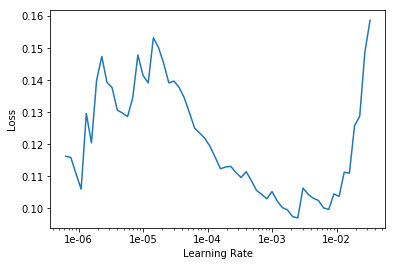

In [53]:
learn.lr_find()
learn.recorder.plot()

In [54]:
learn.fit_one_cycle(5, max_lr=1e-6)

Total time: 10:10
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.112067    0.059783    0.021694    0.978306  (02:01)
2      0.107433    0.061981    0.020661    0.979339  (02:02)
3      0.102204    0.061515    0.020661    0.979339  (02:02)
4      0.099764    0.060147    0.021694    0.978306  (02:01)
5      0.101000    0.060641    0.020661    0.979339  (02:01)



In [55]:
learn.unfreeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


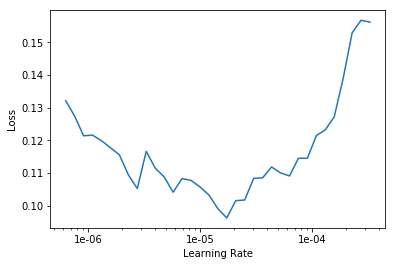

In [56]:
learn.lr_find()
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(6, max_lr=slice(1e-6, 1e-5))

Total time: 15:49
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.107607    0.057595    0.016529    0.983471  (02:41)
2      0.114170    0.062766    0.021694    0.978306  (02:37)
3      0.128666    0.059132    0.019628    0.980372  (02:37)
4      0.109693    0.065559    0.020661    0.979339  (02:37)
5      0.139922    0.060060    0.023760    0.976240  (02:37)
6      0.111564    0.059939    0.022727    0.977273  (02:37)



In [58]:
learn.save('299-unfreeze-resnet50')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


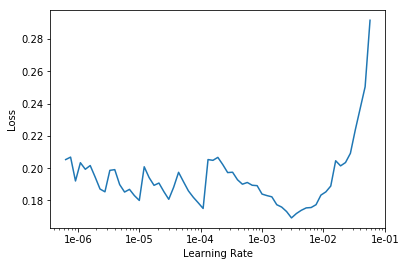

In [59]:
data4 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=24, size=384, ds_tfms=get_transforms(flip_vert=True))
learn.data = data4
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(4, 1e-6)

Total time: 11:58
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.218292    0.079475    0.028169    0.971831  (03:11)
2      0.235558    0.066019    0.020585    0.979415  (02:55)
3      0.181313    0.062577    0.019502    0.980498  (02:55)
4      0.198286    0.068043    0.020585    0.979415  (02:55)



In [61]:
learn.save('384-freeze-resnet50')

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


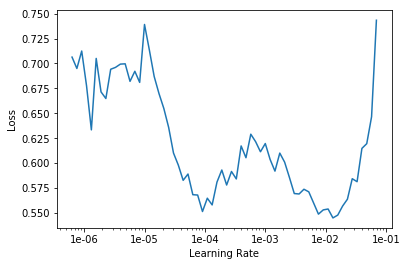

In [62]:
data5 = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=16, size=512, ds_tfms=get_transforms(flip_vert=True))
learn.data = data5
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [63]:
learn.fit_one_cycle(4, 1e-3*5)

Total time: 19:44
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.341443    0.218144    0.080472    0.919528  (05:13)
2      0.362299    0.231317    0.078326    0.921674  (04:50)
3      0.246937    0.127496    0.043991    0.956009  (04:50)
4      0.148304    0.096247    0.034335    0.965665  (04:50)



In [64]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


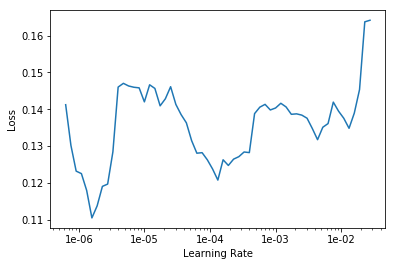

In [65]:
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(8, max_lr=slice(1e-4, 1e-2/5))

Total time: 38:44
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.135632    0.088498    0.036481    0.963519  (04:50)
2      0.142550    0.090915    0.033262    0.966738  (04:50)
3      0.161248    0.083888    0.034335    0.965665  (04:50)
4      0.147760    0.087460    0.037554    0.962446  (04:50)
5      0.114206    0.081552    0.031116    0.968884  (04:50)
6      0.097173    0.073199    0.025751    0.974249  (04:50)
7      0.092627    0.072371    0.030043    0.969957  (04:50)
8      0.096799    0.072915    0.027897    0.972103  (04:51)



In [67]:
learn.save("freeze-512-resnet50")

In [68]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


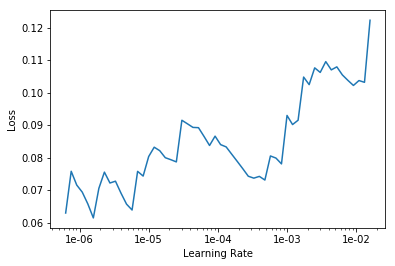

In [69]:
learn.recorder.plot()

In [70]:
learn.fit_one_cycle(8, max_lr=slice(1e-6*5, 1e-4/5))

Total time: 38:47
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.103595    0.072970    0.030043    0.969957  (04:50)
2      0.085377    0.073906    0.026824    0.973176  (04:51)
3      0.098948    0.074211    0.027897    0.972103  (04:50)
4      0.103053    0.075792    0.028970    0.971030  (04:50)
5      0.107810    0.073223    0.030043    0.969957  (04:51)
6      0.081263    0.071791    0.027897    0.972103  (04:50)
7      0.097174    0.072899    0.031116    0.968884  (04:51)
8      0.087692    0.071586    0.027897    0.972103  (04:51)



In [71]:
learn.unfreeze()
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


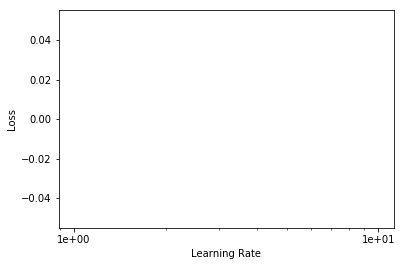

In [72]:
learn.recorder.plot()

In [73]:
learn.fit_one_cycle(6, max_lr=slice(1e-6, 1e-5))

Total time: 37:53
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.125968    0.069054    0.027897    0.972103  (06:22)
2      0.097782    0.072067    0.028970    0.971030  (06:18)
3      0.100376    0.072057    0.026824    0.973176  (06:18)
4      0.103377    0.067305    0.027897    0.972103  (06:18)
5      0.091973    0.069926    0.027897    0.972103  (06:17)
6      0.106263    0.071682    0.025751    0.974249  (06:18)



In [74]:
learn.save('unfreeze-512-resnet50')

### Kaggle submission

In [10]:
tmp_data = ImageDataBunch.from_folder(path, train='train', valid_pct=0.1, test='test', bs=16, size=512, 
                                      ds_tfms=get_transforms(flip_vert=True))
tmp_learn = create_cnn(tmp_data, models.resnet50, metrics=error_rate)
tmp_learn.load('unfreeze-512-resnet50')
preds = tmp_learn.get_preds(DatasetType.Test)
class_guess = preds[0].argmax(dim=1)
len(class_guess)

794

In [11]:
d = dict()
for f, g in zip((path / 'test').ls(), class_guess):
    d[f.name] = tmp_data.classes[g]
len(d)

794

In [12]:
df = pd.DataFrame(list(d.items()), columns=['file', 'species'])
df.to_csv('unfreeze-512-resnet50.csv', index=False)